In [ ]:
#!pip install dbnomics

In [7]:
# Importing all of the necessary packages. 
from dbnomics import fetch_series
import requests
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt

In [14]:
# Importing a csv file with all country codes and creating a for loop 
# in order to add the codes to IMF/DOT/A.AM.TMG_CIF_USD.W00 instead of "W00".
# Storing the already gathered data in new csv file named dbnomics_data for answering 
# required questions. 
codes = pd.read_csv("codes.csv")
with open('codes.csv', newline='') as f:
    reader = csv.reader(f)
    list1 = list(reader)

list2 = []
codes = []

for sublist in list1:
    for item in sublist:
        list2.append(item)

for i in list2:
    codes.append("IMF/DOT/A.AM.TMG_CIF_USD." + str(i))


dt = pd.DataFrame()
df = pd.DataFrame()


if(os.path.isfile('dbnomics_data.csv') == False):
    for i in codes:
        dt = fetch_series(str(i))
        df = df.append(dt)
        dt.iloc[0:0]
        df.to_csv("dbnomics_data.csv")

if(os.path.isfile('dbnomics_data.csv') == True):
    data_new = pd.read_csv("dbnomics_data.csv")

In [15]:
# Sorting the already acquired data and grouping by Counterpart Reference Area. 
dbnomics_data = data_new[["original_value","original_period","Counterpart Reference Area"]]
data_raw = dbnomics_data.groupby(['original_period']).sum()
filtered_data = data_raw.sort_values(by="original_value", ascending = False)
country_raw = dbnomics_data.groupby(['Counterpart Reference Area']).sum()
filtered_country = country_raw.sort_values(by='original_value',ascending = False)

In [16]:
# Question 1. In 2019 Armenia experienced the highest value of imports.
highest_value_year = str(filtered_data.index[0])
highest_value_year

'2019'

In [18]:
# Question 2. Germany is the 3rd largest import partner. 
largest_import_partner = str(filtered_country.index[2])
largest_import_partner

'Germany'

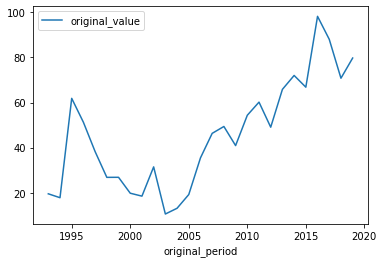

In [19]:
# Question 3. From the plot you can see the tendency of imports from Georgia. 
georgia_tendency = dbnomics_data.loc[dbnomics_data['Counterpart Reference Area'] == "Georgia"]
georgia_tendency.plot(x='original_period', y='original_value')